In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'E:/Datasets/plant dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [8]:
cnn = tf.keras.models.load_model('model/plant_disease_model.keras')

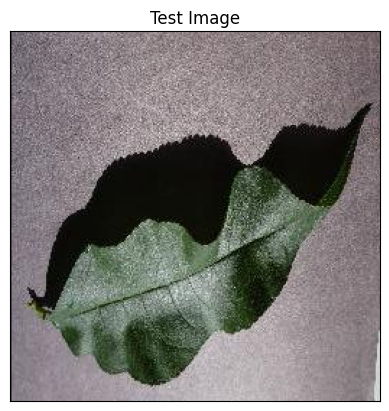

In [9]:
#Test Image Visualization
import cv2
image_path = 'E:/Datasets/plant dataset/valid/Peach___healthy/3af39eb1-8252-4443-b9aa-6c432e95ddd4___Rutg._HL 2434_270deg.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [11]:
print(predictions)

[[1.7398343e-04 1.0335415e-02 5.5640438e-03 2.1160943e-02 1.0948897e-03
  1.8740896e-03 3.6069996e-05 5.8796537e-05 4.6764475e-05 2.1622809e-06
  1.6249687e-06 1.7928059e-04 2.5651653e-04 4.7116632e-06 8.1779226e-06
  6.9234142e-05 1.9605276e-04 9.1504985e-01 2.4848070e-04 4.1497505e-04
  5.3732500e-05 9.3217866e-05 2.1455081e-03 9.7744096e-06 1.2669114e-03
  4.7901258e-06 2.1907006e-04 1.5595497e-05 7.0929163e-06 3.7247542e-02
  2.6595418e-04 9.5693482e-05 4.3818523e-04 1.8085748e-05 7.8082335e-04
  1.5695674e-05 4.0484697e-04 1.4139384e-04]]


In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

17


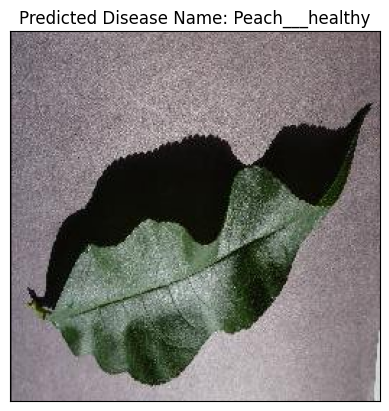

In [13]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Predicted Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()